## Initial Imports

In [113]:
# ============================================
#  Embedded Machine Learning Lab Exam Notebook
#  Pipeline: Q1 → Q5
#  Dataset: heart_failure_clinical_records_dataset.csv
# ============================================

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# Q1

In [114]:
# ================================
# Q1 – Load & explore dataset
# ================================

# df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df = pd.read_csv("kidney_disease.csv")

# remove random characters 
df = df.replace(['\t?', '\t', '?', ''], np.nan)
if 'id' in df.columns:
    df = df.drop('id', axis=1)

# ✅ Basic overview
print("\n--- DataFrame Head ---")
display(df.head())

print("\n--- DataFrame Shape ---")
print(df.shape)

print("\n--- DataFrame Info ---")
df.info()

print("\n--- Summary Stats ---")
display(df.describe())

print("\n--- Column Names ---")
print(df.columns)

# ✅ Feature + Target definitions
print("\n--- Column Names ---")
print(df.columns)

# target = "DEATH_EVENT"
target = "classification"
features = [c for c in df.columns if c != target]
print("\nTarget:", target)
print("\nFeatures:", features)


--- DataFrame Head ---


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd



--- DataFrame Shape ---
(400, 25)

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    object 
 16  wc              294 n

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000



--- Column Names ---
Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

--- Column Names ---
Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

Target: classification

Features: ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [115]:
# ✅ Check missing values
print("\n--- Missing Values ---")
print(df.isna().sum())

binary_map_yes_no = {'yes': 1, 'no': 0}
df['htn'] = df['htn'].map(binary_map_yes_no)
df['dm'] = df['dm'].map(binary_map_yes_no)
df['cad'] = df['cad'].map(binary_map_yes_no)
df['pe'] = df['pe'].map(binary_map_yes_no)
df['ane'] = df['ane'].map(binary_map_yes_no)
df['appet'] = df['appet'].map({'good': 1, 'poor': 0})
df['pcc'] = df['pcc'].map({'present': 1, 'notpresent': 0})
df['ba'] = df['ba'].map({'present': 1, 'notpresent': 0})
df['rbc'] = df['rbc'].map({'abnormal': 1, 'normal': 0})
df['pc'] = df['pc'].map({'abnormal': 1, 'normal': 0})
df['pcv'] = df['pcv'].map(binary_map_yes_no)
df['wc'] = df['wc'].map(binary_map_yes_no)
df['rc'] = df['rc'].map(binary_map_yes_no)
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})


# ✅ Example: fill missing with median
df_filled = df.copy()
for col in df_filled.select_dtypes(include=np.number).columns:
    df_filled[col].fillna(df_filled[col].mean(), inplace=True)
    
for col in df_filled.select_dtypes(include='object').columns:
    df_filled[col].fillna(df_filled[col].mode()[0], inplace=True)

# df_filled = df_filled.fillna(df_filled.median())

# # ✅ Categorical / numeric separation
# df['anaemia'] = df['anaemia'].astype('bool')
# df['diabetes'] = df['diabetes'].astype('bool')
# df['high_blood_pressure'] = df['high_blood_pressure'].astype('bool')
# df['sex'] = df['sex'].astype('category')
# df['smoking'] = df['smoking'].astype('bool')
# df['DEATH_EVENT'] = df['DEATH_EVENT'].astype('category')

# df['rbc'] = df['rbc'].astype('bool')
# df['pc'] = df['pc'].astype('bool')
# df['pcc'] = df['pcc'].astype('bool')
# df['ba'] = df['ba'].astype('bool')
# df['pcv'] = df['pcv'].astype('bool')
# df['wc'] = df['wc'].astype('bool')
# df['rc'] = df['rc'].astype('bool')
# df['htn'] = df['htn'].astype('bool')
# df['dm'] = df['dm'].astype('bool')
# df['cad'] = df['cad'].astype('bool')
# df['appet'] = df['cad'].astype('bool')
# df['pe'] = df['pe'].astype('bool')
# df['ane'] = df['ane'].astype('bool')
# df['classification'] = df['classification'].astype('category')


num_features = df_filled.drop(columns=[target]).select_dtypes(include=['int64','float64']).columns
cat_features = df_filled.drop(columns=[target]).select_dtypes(include=['bool', 'category']).columns

print("\nNumeric:", list(num_features))
print("Categorical:", list(cat_features))



--- Missing Values ---
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

Numeric: ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
Categorical: []


C:\Users\alvan\AppData\Local\Temp\ipykernel_18976\2720374889.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled[col].fillna(df_filled[col].mean(), inplace=True)


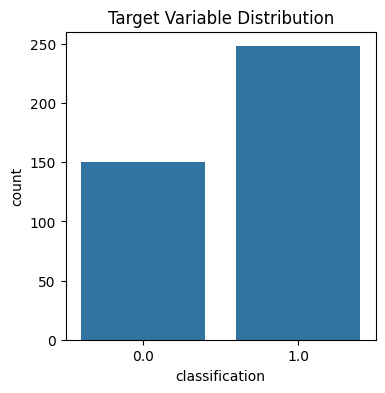

In [116]:
# ✅ Visualize distribution of target
plt.figure(figsize=(4,4))
sns.countplot(data=df, x=target)
plt.title("Target Variable Distribution")
plt.show()

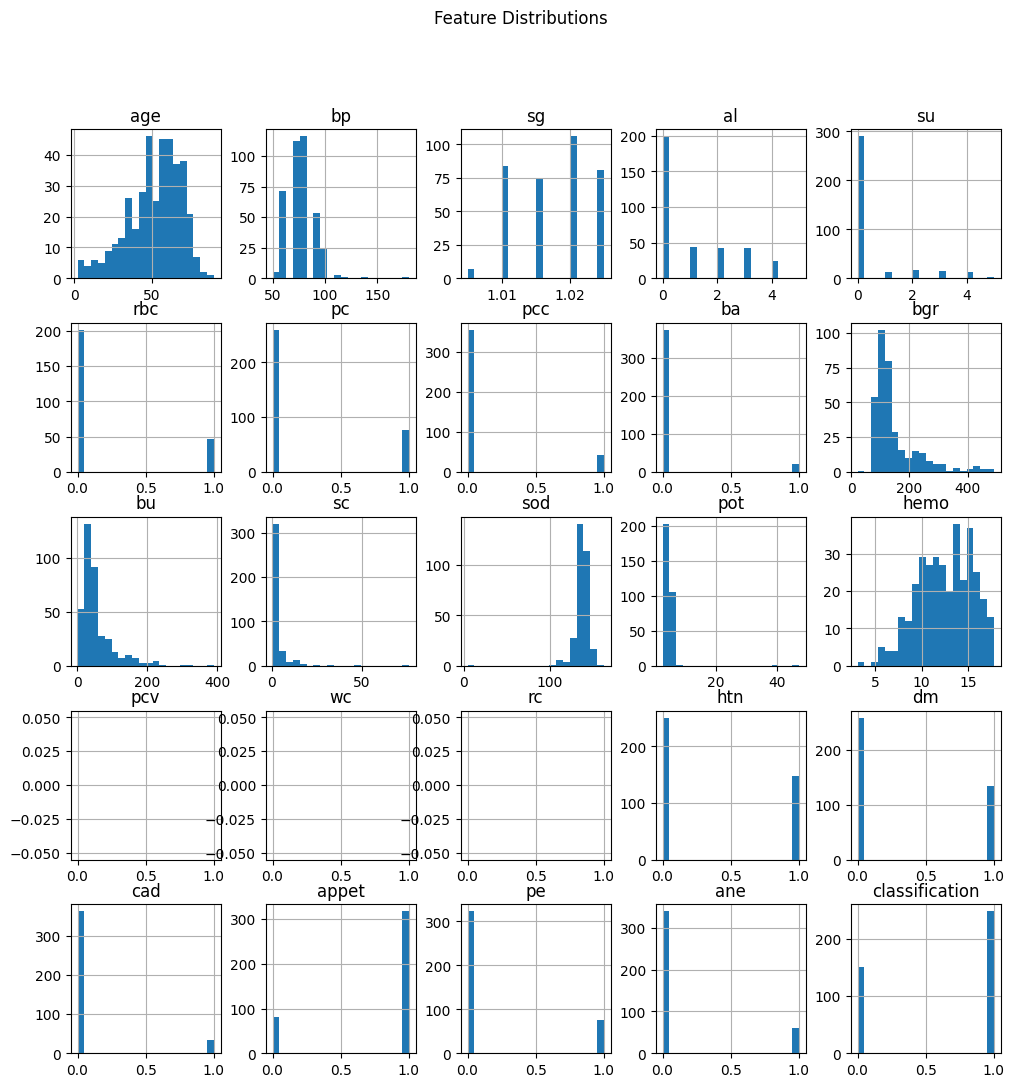

In [117]:
# ✅ Visualize distributions (features)
df.hist(bins=20, figsize=(12,12))
plt.suptitle("Feature Distributions")
plt.show()

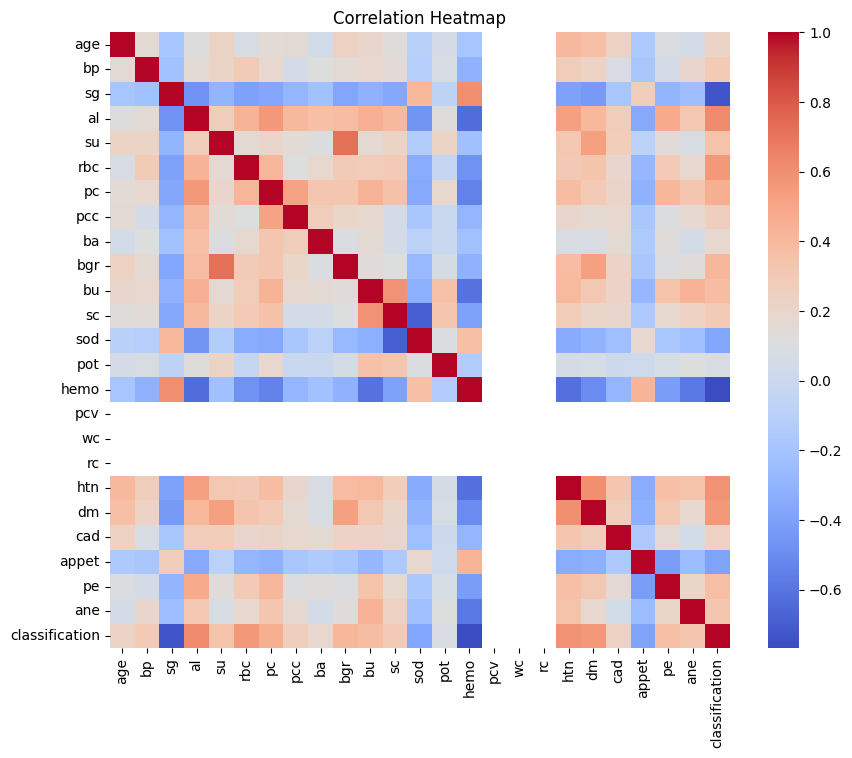

In [118]:
# ✅ Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Q2

In [119]:
# ================================
# Q2 – Preprocessing & Feature Eng
# ================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# ✅ Detect outliers using IQR
display(df.describe())
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
print("\n--- Outlier counts per feature ---")
print(outliers.sum())

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,0.0,0.0,0.0,398.000000,392.000000,396.000000,399.000000,399.000000,399.000000,398.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.189516,0.226866,0.106061,0.055556,148.036517,...,NaN,NaN,NaN,0.369347,0.341837,0.085859,0.794486,0.190476,0.150376,0.623116
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,NaN,NaN,NaN,0.483235,0.474931,0.280510,0.404584,0.393170,0.357888,0.485216
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,...,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163.000000,...,NaN,NaN,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



--- Outlier counts per feature ---
age               10
bp                36
sg                 0
al                 0
su                61
rbc               47
pc                76
pcc               42
ba                22
bgr               34
bu                38
sc                51
sod               16
pot                4
hemo               1
pcv                0
wc                 0
rc                 0
htn                0
dm                 0
cad               34
appet             82
pe                76
ane               60
classification     0
dtype: int64


In [120]:
# ✅ Preprocessing pipeline
numerical_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, num_features),
    ("cat", categorical_pipeline, cat_features)
])

# ✅ (Optional) Feature selection — example: SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

feature_selector = SelectKBest(score_func=f_classif, k="all")

# Q3


In [121]:
# ================================
# Q3 – Model: DT, RF, SVM
# ================================

from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X = df_filled[features]
y = df_filled[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

results = {}

for model_name, model in models.items():
    pipe = Pipeline([
        ("pre", preprocessor),
        ("select", feature_selector),
        ("clf", model),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== {model_name} ===")
    print(classification_report(y_test, y_pred))

    results[model_name] = acc

print("\n--- Model Accuracy Comparison ---")
print(results)

c:\Users\alvan\OneDrive\Documents\Engineering - Fourth Year\CME-465\.venv\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: ['pcv' 'wc' 'rc']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

# Q4

In [ ]:
# ================================
# Q4 – Hyperparameter Tuning
# ================================

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np


# ✅ Choose model: RF or SVM
# Here example = Random Forest
model = RandomForestClassifier(random_state=42)


pipe = Pipeline([
    ("pre", preprocessor),
    ("select", feature_selector),
    ("clf", model)
])

# Parameter grids
param_grid = {
    "clf__n_estimators": [50, 100, 200],
    "clf__max_depth": [None, 5, 10, 20],
    "clf__min_samples_split": [2, 5, 10],
}

# ✅ Grid Search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters (GridSearch):")
print(grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters (GridSearch):
{'clf__max_depth': 5, 'clf__min_samples_split': 5, 'clf__n_estimators': 50}
Best Score: 0.8703014184397162


In [ ]:
# ✅ Randomized Search
param_dist = {
    "clf__n_estimators": [50, 100, 200, 300],
    "clf__max_depth": [None, 10, 20, 30],
    "clf__min_samples_split": [2, 5, 10],
}

random_search = RandomizedSearchCV(pipe, param_dist, cv=5, scoring='accuracy',
                                   n_iter=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("\nBest Parameters (RandomSearch):")
print(random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters (RandomSearch):
{'clf__n_estimators': 300, 'clf__min_samples_split': 5, 'clf__max_depth': 30}
Best Score: 0.861968085106383


In [ ]:
# ==========================
# ✅ Compare Before + After
# ==========================

# ---- BEFORE (Baseline: model with default parameters) ----

baseline_model = pipe
baseline_model.fit(X_train, y_train)
y_pred_base = baseline_model.predict(X_test)

baseline_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_base),
    "precision": precision_score(y_test, y_pred_base, zero_division=0),
    "recall": recall_score(y_test, y_pred_base, zero_division=0),
    "f1": f1_score(y_test, y_pred_base, zero_division=0),
}


# ---- AFTER (Best Parameters from GridSearch) ----

best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

best_metrics = {
    "accuracy": accuracy_score(y_test, y_pred_best),
    "precision": precision_score(y_test, y_pred_best, zero_division=0),
    "recall": recall_score(y_test, y_pred_best, zero_division=0),
    "f1": f1_score(y_test, y_pred_best, zero_division=0),
}

print("\n--- Baseline Model Metrics ---")
print(baseline_metrics)

print("\n--- Tuned Model Metrics ---")
print(best_metrics)

print("\nClassification Report (Tuned Model):\n")
print(classification_report(y_test, y_pred_best))


--- Baseline Model Metrics ---
{'accuracy': 0.8333333333333334, 'precision': 0.8, 'recall': 0.631578947368421, 'f1': 0.7058823529411765}

--- Tuned Model Metrics ---
{'accuracy': 0.8333333333333334, 'precision': 0.8, 'recall': 0.631578947368421, 'f1': 0.7058823529411765}

Classification Report (Tuned Model):

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60



# Q5

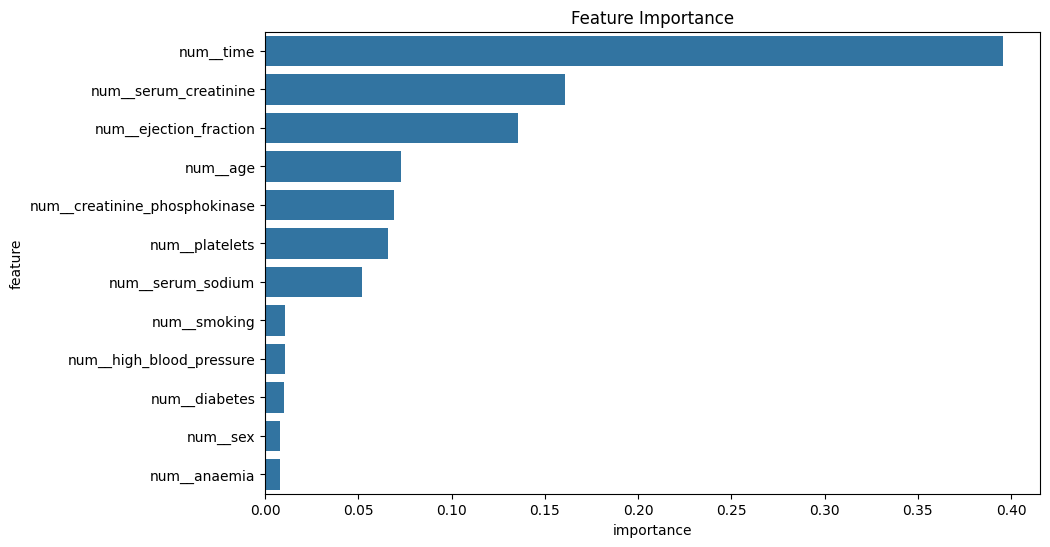


=== Top Features ===


,feature,importance
11,num__time,0.395836
7,num__serum_creatinine,0.160881
4,num__ejection_fraction,0.135624
0,num__age,0.072814
2,num__creatinine_phosphokinase,0.068895
6,num__platelets,0.066100
8,num__serum_sodium,0.052198
10,num__smoking,0.010546
5,num__high_blood_pressure,0.010429
3,num__diabetes,0.010316


In [ ]:
# ================================
# Q5 – Visualization & Insights
# ================================

best_model = random_search.best_estimator_

from sklearn.inspection import permutation_importance

# 1) Get transformed feature names properly
pre = best_model.named_steps["pre"]
feature_names = pre.get_feature_names_out()

# 2) Feature importance
# (RandomForest supports .feature_importances_)
clf = best_model.named_steps["clf"]

importances = clf.feature_importances_

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

# 3) Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x="importance", y="feature")
plt.title("Feature Importance")
plt.show()

# 4) Insights
print("\n=== Top Features ===")
display(feat_imp.head(10))
